<a href="https://colab.research.google.com/github/Vikram12301/Time-Series-Classification-for-FordA/blob/main/Models/ROCKET/Rocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sktime

     |████████████████████████████████| 6.1 MB 2.6 MB/s 
     |████████████████████████████████| 3.3 MB 43.9 MB/s 
     |████████████████████████████████| 9.8 MB 10.5 MB/s 
     |████████████████████████████████| 26.3 MB 76.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.8.1 requires statsmodels>=0.12.1, but you have statsmodels 0.10.2 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datatypes._panel._convert import from_2d_array_to_nested,from_nested_to_2d_array
from sktime.transformations.panel.rocket import Rocket
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,plot_roc_curve
import warnings
from sklearn.model_selection import learning_curve
warnings.filterwarnings('ignore')

In [3]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

X_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
X_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [4]:
np.isnan(X_train).any()

False

In [5]:
np.isnan(X_test).any()

False

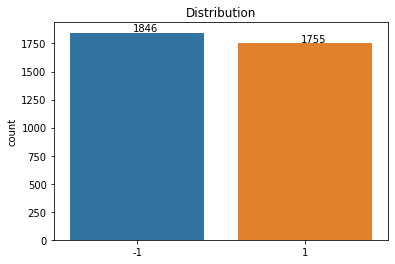

In [6]:
ax = sns.countplot(y_train)
plt.title('Distribution')
for p in ax.patches:
  ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.375, p.get_height()+10))

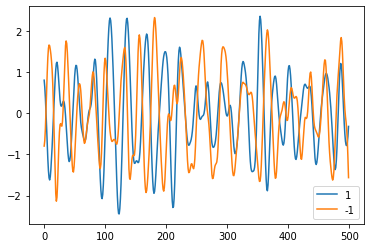

In [7]:
classes = np.unique(y_train)
f0 = np.where(y_train==1)[0][0]
f1 = np.where(y_train==-1)[0][0]
plt.plot(X_train[f0],label='1')
plt.plot(X_train[f1],label='-1')
plt.legend(loc="best")
plt.show()
plt.close()

In [8]:
X_train_nested = from_2d_array_to_nested(X_train)
X_test_nested = from_2d_array_to_nested(X_test)

In [9]:
rocket = Rocket()

In [10]:
rocket_X_train = rocket.fit_transform(X_train_nested)

In [11]:
rocket_X_test = rocket.transform(X_test_nested)

In [12]:
model_log = LogisticRegression(max_iter=10000)

In [13]:
model_log.fit(rocket_X_train, y_train)

LogisticRegression(max_iter=10000)

In [14]:
ypred_logistic = model_log.predict(rocket_X_test)

In [15]:
print("The accuracy for logistic regression is",accuracy_score(ypred_logistic,y_test))
print("The precision for logistic regression is",precision_score(ypred_logistic,y_test))
print("The recall for logistic regression is",recall_score(ypred_logistic,y_test))

The accuracy for logistic regression is 0.9265151515151515
The precision for logistic regression is 0.918622848200313
The recall for logistic regression is 0.9287974683544303


In [16]:
ridge = RidgeClassifierCV(alphas=np.logspace(0.2,0.5,10), normalize=True)

In [17]:
ridge.fit(rocket_X_train, y_train)

RidgeClassifierCV(alphas=array([1.58489319, 1.7113283 , 1.8478498 , 1.99526231, 2.15443469,
       2.32630507, 2.51188643, 2.71227258, 2.92864456, 3.16227766]),
                  normalize=True)

In [18]:
ypred_ridge = ridge.predict(rocket_X_test)

In [19]:
print("The accuracy for ridge classifier is",accuracy_score(ypred_ridge,y_test))
print("The precision for ridge classifier is",precision_score(ypred_ridge,y_test))
print("The recall for ridge classifier is",recall_score(ypred_ridge,y_test))

The accuracy for ridge classifier is 0.9431818181818182
The precision for ridge classifier is 0.9358372456964006
The recall for ridge classifier is 0.9462025316455697


In [20]:
svm = SVC()
svm.fit(rocket_X_train, y_train)

SVC()

In [21]:
ypred_svm = svm.predict(rocket_X_test)

In [22]:
print("The accuracy for SVM is",accuracy_score(ypred_svm,y_test))
print("The precision for SVM is",precision_score(ypred_svm,y_test))
print("The recall for SVM is",recall_score(ypred_svm,y_test))

The accuracy for SVM is 0.9234848484848485
The precision for SVM is 0.9280125195618153
The recall for SVM is 0.9151234567901234


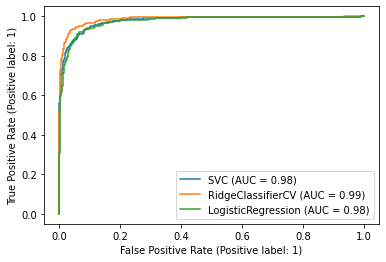

In [23]:
svc_disp = plot_roc_curve(svm, rocket_X_test, y_test)
ridge_disp = plot_roc_curve(ridge, rocket_X_test, y_test,ax=svc_disp.ax_)
plot_roc_curve(model_log, rocket_X_test, y_test,ax=ridge_disp.ax_)
plt.show()

In [26]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_score_mean=np.mean(train_scores,axis=1)
    train_score_std=np.std(train_scores,axis=1)
    test_score_mean=np.mean(test_scores,axis=1)
    test_score_std=np.std(test_scores,axis=1)
    plt.grid()
    plt.fill_between(train_sizes,train_score_mean-train_score_std,train_score_mean+train_score_std,alpha=0.1,color='g')
    plt.fill_between(train_sizes,test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1,color='r')
    plt.plot(train_sizes,train_score_mean,'o-',color='r',label='Training')
    plt.plot(train_sizes,test_score_mean,'o-',color='g',label='Testing')
    plt.legend(loc='best')
    print(train_sizes)
    return plt

[ 288  576  864 1152 1440 1728 2016 2304 2592 2880]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

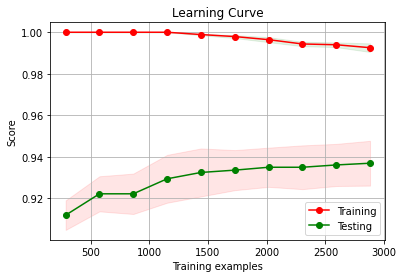

In [27]:
plot_learning_curve(ridge,'Learning Curve',rocket_X_train,y_train,ylim=None,cv=None,n_jobs=-1,train_sizes=np.linspace(0.1,1.0,10))